In [221]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=130
pd.options.display.max_rows=200

# APPLICATION_TRAIN

In [312]:
app=pd.read_csv('application_train.csv')
app

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [313]:
app.shape

(307511, 122)

In [314]:
app.drop_duplicates(inplace=True)

In [225]:
app.keys()

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [226]:
app.corr()['TARGET'].sort_values(ascending=False)

TARGET                          1.000000
DAYS_BIRTH                      0.078239
REGION_RATING_CLIENT_W_CITY     0.060893
REGION_RATING_CLIENT            0.058899
DAYS_LAST_PHONE_CHANGE          0.055218
DAYS_ID_PUBLISH                 0.051457
REG_CITY_NOT_WORK_CITY          0.050994
FLAG_EMP_PHONE                  0.045982
REG_CITY_NOT_LIVE_CITY          0.044395
FLAG_DOCUMENT_3                 0.044346
DAYS_REGISTRATION               0.041975
OWN_CAR_AGE                     0.037612
LIVE_CITY_NOT_WORK_CITY         0.032518
DEF_30_CNT_SOCIAL_CIRCLE        0.032248
DEF_60_CNT_SOCIAL_CIRCLE        0.031276
FLAG_WORK_PHONE                 0.028524
AMT_REQ_CREDIT_BUREAU_YEAR      0.019930
CNT_CHILDREN                    0.019187
CNT_FAM_MEMBERS                 0.009308
OBS_30_CNT_SOCIAL_CIRCLE        0.009131
OBS_60_CNT_SOCIAL_CIRCLE        0.009022
REG_REGION_NOT_WORK_REGION      0.006942
REG_REGION_NOT_LIVE_REGION      0.005576
FLAG_DOCUMENT_2                 0.005417
FLAG_DOCUMENT_21

In [227]:
app.corr()['TARGET'].sort_values(ascending=False).shape

(106,)

### Dropping Features Based on Correlation with repect to Target Variable.

In [315]:
app.drop(['CNT_FAM_MEMBERS','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','REG_REGION_NOT_WORK_REGION','REG_REGION_NOT_LIVE_REGION','FLAG_DOCUMENT_2','FLAG_DOCUMENT_21','LIVE_REGION_NOT_WORK_REGION','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_WEEK','FLAG_MOBIL','FLAG_CONT_MOBILE','FLAG_DOCUMENT_20','FLAG_DOCUMENT_5','FLAG_DOCUMENT_12','FLAG_DOCUMENT_19','FLAG_DOCUMENT_10','FLAG_DOCUMENT_7','NONLIVINGAPARTMENTS_MODE','FLAG_EMAIL','AMT_REQ_CREDIT_BUREAU_QRT','FLAG_DOCUMENT_4','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAPARTMENTS_AVG','FLAG_DOCUMENT_17','AMT_INCOME_TOTAL','FLAG_DOCUMENT_11','FLAG_DOCUMENT_9','FLAG_DOCUMENT_15','FLAG_DOCUMENT_18','FLAG_DOCUMENT_8','YEARS_BEGINEXPLUATATION_MODE','FLAG_DOCUMENT_14','YEARS_BEGINEXPLUATATION_AVG','YEARS_BEGINEXPLUATATION_MEDI'],axis=1,inplace=True)

In [316]:
app

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_13,FLAG_DOCUMENT_16,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,0,1,Laborers,2,2,WEDNESDAY,10,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0252,0.0383,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0250,0.0369,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,-1134.0,1,0,0,0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,0,1,Core staff,1,1,MONDAY,11,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0098,0.0924,0.0538,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.0968,0.0529,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0100,reg oper account,block of flats,0.0714,Block,No,0.0,0.0,-828.0,1,0,0,0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,Laborers,2,2,MONDAY,9,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-815.0,0,0,0,0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,0,0,Laborers,2,2,WEDNESDAY,17,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-617.0,1,0,0,0,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,0,0,Core staff,2,2,THURSDAY,11,0,1,1,Religion,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-1106.0,0,0,0,0,0.0,0.0
...,...,...,...

In [317]:
app.drop(['FLAG_DOCUMENT_3','FLAG_DOCUMENT_6','FLAG_DOCUMENT_13','FLAG_DOCUMENT_16',],axis=1,inplace=True)
# has no correlation with any feature and has no % contribution in 'FEATURE_IMPORTANCES_'

In [318]:
# Dropped becoz more than 2lakh of the records r missing
app.drop(['FONDKAPREMONT_MODE'],axis=1,inplace=True)

In [319]:
app.drop(['LIVE_CITY_NOT_WORK_CITY'],axis=1,inplace=True)
# highly correlated with 'REG_CITY_NOT_LIVE_CITY'

In [320]:
app.drop(['OWN_CAR_AGE'],axis=1,inplace=True)
# correlated with 'FLAG_OWN_CAR'

In [321]:
app.drop(['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY'],axis=1,inplace=True)
# correlated with 'REGION_POPULATION_RELATIVE'

In [322]:
app

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,0,1,Laborers,WEDNESDAY,10,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0252,0.0383,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0250,0.0369,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,block of flats,0.0149,"Stone, brick",No,2.0,2.0,-1134.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,0,1,Core staff,MONDAY,11,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0098,0.0924,0.0538,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.0968,0.0529,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0100,block of flats,0.0714,Block,No,0.0,0.0,-828.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,Laborers,MONDAY,9,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-815.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,0,0,Laborers,WEDNESDAY,17,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-617.0,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,0,0,Core staff,THURSDAY,11,0,1,Religion,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-1106.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456

In [236]:
app.shape

(307511, 77)

In [237]:
app.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_PHONE                         0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_CITY_NOT_LIVE_CITY             0
R

In [323]:
app.dropna(subset=['AMT_ANNUITY'],axis=0,how='any',inplace=True)

In [324]:
# More than 2 lakh records are missing
app.drop(['BASEMENTAREA_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','LIVINGAPARTMENTS_MEDI','FLOORSMIN_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI'],axis=1,inplace=True)

In [240]:
app.describe(exclude=None)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
count,307499.000000,307499.000000,307499.000000,3.074990e+05,307499.000000,3.072210e+05,307499.000000,307499.000000,307499.000000,307499.000000,307499.000000,307499.000000,307499.000000,307499.000000,307499.000000,307499.000000,307499.000000,134125.000000,3.068390e+05,246535.000000,151444.000000,143614.000000,152677.000000,154485.000000,98866.000000,124918.000000,97309.000000,153155.000000,137823.000000,151444.000000,127565.000000,103020.000000,92643.000000,143614.000000,152677.000000,154485.000000,98866.000000,124918.000000,97309.000000,153155.000000,137823.000000,151444.000000,127565.000000,143614.000000,152677.000000,154485.000000,124918.000000,153155.000000,137823.000000,159074.000000,306478.000000,306478.000000,307498.000000,265981.000000,265981.000000
mean,278181.934868,0.080732,0.417068,5.990273e+05,27108.573909,5.383973e+05,0.020868,-16037.054212,63817.623992,-4986.109490,-2994.212498,0.819882,0.199363,0.281058,12.063347,0.078166,0.230446,0.502125,5.143905e-01,0.510858,0.117439,0.078940,0.149725,0.226280,0.231894,0.066328,0.100772,0.107398,0.028357,0.114231,0.087542,0.759637,0.042552,0.074489,0.145193,0.222313,0.228059,0.064952,0.105644,0.105975,0.027022,0.117849,0.087954,0.078076,0.149213,0.225894,0.067163,0.108606,0.028235,0.102547,0.143426,0.100053,-962.862113,0.267384,1.899925
std,102790.364944,0.272423,0.722131,4.024927e+05,14493.737315,3.694484e+05,0.013831,4364.000425,141277.920123,3522.857254,1509.452619,0.384286,0.399522,0.449516,3.265843,0.268433,0.421119,0.211062,1.910605e-01,0.194845,0.108240,0.134573,0.100049,0.144639,0.161377,0.081164,0.092575,0.110564,0.069523,0.107937,0.084308,0.110112,0.074445,0.132257,0.100977,0.143707,0.161156,0.081730,0.097881,0.111847,0.070255,0.109076,0.082179,0.134464,0.100369,0.145065,0.082147,0.112260,0.070166,0.107464,0.446706,0.362297,826.809159,0.916010,1.869212
min,100002.000000,0.000000,0.000000,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014568,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000
25%,189149.500000,0.000000,0.000000,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.000000,-4299.000000,1.000000,0.000000,0.000000,10.000000,0.000000,0.000000,0.334003,3.924522e-01,0.370650,0.057700,0.000000,0.069000,0.166700,0.083300,0.018700,0.050400,0.045300,0.000000,0.052500,0.040700,0.699400,0.007200,0.000000,0.069000,0.166700,0.083300,0.016600,0.054200,0.042700,0.000000,0.058300,0.043700,0.000000,0.069000,0.166700,0.018700,0.045700,0.000000,0.041200,0.000000,0.000000,-1570.000000,0.000000,0.000000
50%,278204.000000,0.000000,0.000000,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,1.000000,0.000000,0.

In [241]:
app.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_PHONE                         0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_CITY_NOT_LIVE_CITY             0
R

In [325]:
# 278 records are having null.
app.dropna(subset=['AMT_GOODS_PRICE'],axis=0,how='any',inplace=True)

In [326]:
#659 records.
app.dropna(subset=['EXT_SOURCE_2'],axis=0,how='any',inplace=True)

In [327]:
#1014 records.
app.dropna(subset=['NAME_TYPE_SUITE'],axis=0,how='any',inplace=True)

In [328]:
# 1017 records
app.dropna(subset=['DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'],axis=0,how='all',inplace=True)

In [329]:
app.OCCUPATION_TYPE.describe()

count       209096
unique          18
top       Laborers
freq         54730
Name: OCCUPATION_TYPE, dtype: object

In [330]:
app['OCCUPATION_TYPE'].fillna(app['OCCUPATION_TYPE'].mode()[0],inplace=True)

In [331]:
app.EXT_SOURCE_1.describe()

count    132879.000000
mean          0.501986
std           0.211049
min           0.014568
25%           0.333967
50%           0.505819
75%           0.674901
max           0.962693
Name: EXT_SOURCE_1, dtype: float64

In [249]:
app['EXT_SOURCE_1'].fillna(app['EXT_SOURCE_1'].mean(),inplace=True)

In [250]:
app.EXT_SOURCE_3.describe()

count    244280.000000
mean          0.510764
std           0.194843
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [251]:
app['EXT_SOURCE_3'].fillna(app['EXT_SOURCE_3'].mean(),inplace=True)

In [252]:
app.APARTMENTS_AVG.describe()

count    149854.000000
mean          0.117334
std           0.108097
min           0.000000
25%           0.057700
50%           0.087600
75%           0.148500
max           1.000000
Name: APARTMENTS_AVG, dtype: float64

In [253]:
app['APARTMENTS_AVG'].fillna(app['APARTMENTS_AVG'].mean(),inplace=True)

In [254]:
app.ELEVATORS_AVG.describe()

count    142072.000000
mean          0.078762
std           0.134346
min           0.000000
25%           0.000000
50%           0.000000
75%           0.120000
max           1.000000
Name: ELEVATORS_AVG, dtype: float64

In [255]:
app['ELEVATORS_AVG'].fillna(app['ELEVATORS_AVG'].mean(),inplace=True)

In [256]:
app.ENTRANCES_AVG .describe()

count    151063.000000
mean          0.149675
std           0.100034
min           0.000000
25%           0.069000
50%           0.137900
75%           0.206900
max           1.000000
Name: ENTRANCES_AVG, dtype: float64

In [257]:
app.FLOORSMAX_AVG.describe()

count    152854.000000
mean          0.226095
std           0.144451
min           0.000000
25%           0.166700
50%           0.166700
75%           0.333300
max           1.000000
Name: FLOORSMAX_AVG, dtype: float64

In [258]:
app['FLOORSMAX_AVG'].fillna(app['FLOORSMAX_AVG'].mean(),inplace=True)

In [259]:
app['FLOORSMIN_AVG'].fillna(app['FLOORSMIN_AVG'].mean(),inplace=True)

In [260]:
 app.LANDAREA_AVG.describe()

count    123594.000000
mean          0.066273
std           0.081039
min           0.000000
25%           0.018700
50%           0.048100
75%           0.085600
max           1.000000
Name: LANDAREA_AVG, dtype: float64

In [261]:
app['LANDAREA_AVG'].fillna(app['LANDAREA_AVG'].mean(),inplace=True)

In [262]:
 app.LIVINGAPARTMENTS_AVG.describe()

count    96272.000000
mean         0.100662
std          0.092368
min          0.000000
25%          0.050400
50%          0.075600
75%          0.121000
max          1.000000
Name: LIVINGAPARTMENTS_AVG, dtype: float64

In [332]:
app['LIVINGAPARTMENTS_AVG'].fillna(app['LIVINGAPARTMENTS_AVG'].mean(),inplace=True)

In [264]:
app['ELEVATORS_AVG'].fillna(app['ELEVATORS_AVG'].mean(),inplace=True)

In [265]:
app.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_PHONE                         0
OCCUPATION_TYPE                    0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_CITY_NOT_LIVE_CITY             0
R

In [266]:
print(app.ENTRANCES_AVG.describe())

count    151063.000000
mean          0.149675
std           0.100034
min           0.000000
25%           0.069000
50%           0.137900
75%           0.206900
max           1.000000
Name: ENTRANCES_AVG, dtype: float64


In [267]:
app.APARTMENTS_MODE.describe()

count    149854.000000
mean          0.114135
std           0.107804
min           0.000000
25%           0.052500
50%           0.084000
75%           0.143900
max           1.000000
Name: APARTMENTS_MODE, dtype: float64

In [333]:
app['ENTRANCES_AVG'].fillna(app['ENTRANCES_AVG'].mean(),inplace=True)
app['LIVINGAREA_AVG'].fillna(app['LIVINGAREA_AVG'].mean(),inplace=True)
app['NONLIVINGAREA_AVG'].fillna(app['NONLIVINGAREA_AVG'].mean(),inplace=True)
app['APARTMENTS_MODE'].fillna(app['APARTMENTS_MODE'].mean(),inplace=True)
app['BASEMENTAREA_MODE'].fillna(app['BASEMENTAREA_MODE'].mean(),inplace=True)
app['YEARS_BUILD_MODE'].fillna(app['YEARS_BUILD_MODE'].mean(),inplace=True)
app['COMMONAREA_MODE'].fillna(app['COMMONAREA_MODE'].mean(),inplace=True)

In [334]:
app.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_PHONE                         0
OCCUPATION_TYPE                    0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_CITY_NOT_LIVE_CITY             0
R

In [335]:
app['ELEVATORS_MODE'].fillna(app['ELEVATORS_MODE'].mean(),inplace=True)
app['ENTRANCES_MODE'].fillna(app['ENTRANCES_MODE'].mean(),inplace=True)
app['FLOORSMAX_MODE'].fillna(app['FLOORSMAX_MODE'].mean(),inplace=True)
app['FLOORSMIN_MODE'].fillna(app['FLOORSMIN_MODE'].mean(),inplace=True)
app['LANDAREA_MODE'].fillna(app['LANDAREA_MODE'].mean(),inplace=True)
app['LIVINGAPARTMENTS_MODE'].fillna(app['LIVINGAPARTMENTS_MODE'].mean(),inplace=True)

In [336]:
app['LIVINGAREA_MODE'].fillna(app['LIVINGAREA_MODE'].mean(),inplace=True)
app['NONLIVINGAREA_MODE'].fillna(app['NONLIVINGAREA_MODE'].mean(),inplace=True)
app['LIVINGAREA_MODE'].fillna(app['LIVINGAREA_MODE'].mean(),inplace=True)
app['NONLIVINGAREA_MODE'].fillna(app['NONLIVINGAREA_MODE'].mean(),inplace=True)
app['APARTMENTS_MEDI'].fillna(app['APARTMENTS_MEDI'].mean(),inplace=True)
app['BASEMENTAREA_MEDI'].fillna(app['BASEMENTAREA_MEDI'].mean(),inplace=True)
app['ELEVATORS_MEDI'].fillna(app['ELEVATORS_MEDI'].mean(),inplace=True)

In [337]:
app.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_PHONE                         0
OCCUPATION_TYPE                    0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_CITY_NOT_LIVE_CITY             0
R

In [338]:
app['ENTRANCES_MEDI'].fillna(app['ENTRANCES_MEDI'].mean(),inplace=True)
app['FLOORSMAX_MEDI'].fillna(app['FLOORSMAX_MEDI'].mean(),inplace=True)
app['LANDAREA_MEDI'].fillna(app['LANDAREA_MEDI'].mean(),inplace=True)
app['LIVINGAREA_MEDI'].fillna(app['LIVINGAREA_MEDI'].mean(),inplace=True)
app['NONLIVINGAREA_MEDI'].fillna(app['NONLIVINGAREA_MEDI'].mean(),inplace=True)

In [339]:
app.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_PHONE                         0
OCCUPATION_TYPE                    0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_CITY_NOT_LIVE_CITY             0
R

In [340]:
app.HOUSETYPE_MODE.describe()

count             151594
unique                 3
top       block of flats
freq              148908
Name: HOUSETYPE_MODE, dtype: object

In [341]:
app['HOUSETYPE_MODE'].fillna(app['HOUSETYPE_MODE'].mode()[0],inplace=True)

In [342]:
app.TOTALAREA_MODE.describe()

count    157399.000000
mean          0.102414
std           0.107285
min           0.000000
25%           0.041200
50%           0.068700
75%           0.127400
max           1.000000
Name: TOTALAREA_MODE, dtype: float64

In [343]:
app['TOTALAREA_MODE'].fillna(app['TOTALAREA_MODE'].mean(),inplace=True)

In [344]:
app.WALLSMATERIAL_MODE.describe()

count     149553
unique         7
top        Panel
freq       65343
Name: WALLSMATERIAL_MODE, dtype: object

In [345]:
app['WALLSMATERIAL_MODE'].fillna(app['WALLSMATERIAL_MODE'].mode()[0],inplace=True)

In [346]:
app.EMERGENCYSTATE_MODE.describe()

count     160056
unique         2
top           No
freq      157744
Name: EMERGENCYSTATE_MODE, dtype: object

In [347]:
app['EMERGENCYSTATE_MODE'].fillna(app['EMERGENCYSTATE_MODE'].mode()[0],inplace=True)

In [348]:
app.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_PHONE                         0
OCCUPATION_TYPE                    0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_CITY_NOT_LIVE_CITY             0
R

In [349]:
app.AMT_REQ_CREDIT_BUREAU_MON.describe()

count    263423.000000
mean          0.267782
std           0.915330
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [350]:
app['AMT_REQ_CREDIT_BUREAU_MON'].fillna(app['AMT_REQ_CREDIT_BUREAU_MON'].mean(),inplace=True)

In [351]:
app.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    263423.000000
mean          1.905904
std           1.869645
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [352]:
app['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(app['AMT_REQ_CREDIT_BUREAU_YEAR'].mean(),inplace=True)

In [353]:
app.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_PHONE                         0
OCCUPATION_TYPE                    0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_CITY_NOT_LIVE_CITY             0
R

In [354]:
app.shape

(304531, 70)

In [355]:
app.keys()

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', '

In [356]:
columns_rearranged=['SK_ID_CURR','NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'LANDAREA_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAREA_MEDI', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR','TARGET']

In [357]:
app=app[columns_rearranged]

In [358]:
app

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,100002,Cash loans,M,N,Y,0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,0,1,Laborers,WEDNESDAY,10,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.00,0.069000,0.0833,0.1250,0.0369,0.020200,0.019000,0.000000,0.025200,0.03830,0.63410,0.01440,0.000000,0.069000,0.083300,0.125000,0.037700,0.022000,0.019800,0.000000,0.025000,0.036900,0.000000,0.069000,0.083300,0.03750,0.019300,0.000000,block of flats,0.014900,"Stone, brick",No,2.0,2.0,-1134.0,0.000000,1.000000,1
1,100003,Cash loans,F,N,N,0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,0,1,Core staff,MONDAY,11,0,0,School,0.311267,0.622246,NaN,0.0959,0.08,0.034500,0.2917,0.3333,0.0130,0.077300,0.054900,0.009800,0.092400,0.05380,0.80400,0.04970,0.080600,0.034500,0.291700,0.333300,0.012800,0.079000,0.055400,0.000000,0.096800,0.052900,0.080000,0.034500,0.291700,0.01320,0.055800,0.010000,block of flats,0.071400,Block,No,0.0,0.0,-828.0,0.000000,0.000000,0
2,100004,Revolving loans,M,Y,Y,0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,Laborers,MONDAY,9,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,0.149675,NaN,NaN,NaN,0.100662,0.107264,0.028279,0.114135,0.08748,0.75964,0.04251,0.074327,0.145151,0.222132,0.227845,0.064897,0.105537,0.105856,0.026949,0.117746,0.087888,0.077903,0.149166,0.225715,0.06711,0.108476,0.028162,block of flats,0.102414,Panel,No,0.0,0.0,-815.0,0.000000,0.000000,0
3,100006,Cash loans,F,N,Y,0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,0,0,Laborers,WEDNESDAY,17,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,0.149675,NaN,NaN,NaN,0.100662,0.107264,0.028279,0.114135,0.08748,0.75964,0.04251,0.074327,0.145151,0.222132,0.227845,0.064897,0.105537,0.105856,0.026949,0.117746,0.087888,0.077903,0.149166,0.225715,0.06711,0.108476,0.028162,block of flats,0.102414,Panel,No,0.0,0.0,-617.0,0.267782,1.905904,0
4,100007,Cash loans,M,N,Y,0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,0,0,Core staff,THURSDAY,11,0,1,Religion,NaN,0.322738,NaN,NaN,NaN,0.149675,NaN,NaN,NaN,0.100662,0.107264,0.028279,0.114135,0.08748,0.75964,0.04251,0.074327,0.145151,0.222132,0.227845,0.064897,0.105537,0.105856,0.026949,0.117746,0.087888,0.077903,0.149166,0.225715,0.06711,0.108476,0.028162,block of flats,0.102414,Panel,No,0.0,0.0,-1106.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [359]:
app.isnull().sum()

SK_ID_CURR                         0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                    0
NAME_TYPE_SUITE                    0
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_PHONE                         0
OCCUPATION_TYPE                    0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
O

In [295]:
app

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,100002,Cash loans,M,N,Y,0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,0,1,Laborers,WEDNESDAY,10,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.024700,0.000000,0.069000,0.083300,0.12500,0.036900,0.020200,0.019000,0.000000,0.025200,0.03830,0.63410,0.01440,0.000000,0.069000,0.083300,0.125000,0.037700,0.022000,0.019800,0.000000,0.025000,0.036900,0.000000,0.069000,0.083300,0.03750,0.019300,0.000000,block of flats,0.014900,"Stone, brick",No,2.0,2.0,-1134.0,0.000000,1.000000,1
1,100003,Cash loans,F,N,N,0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,0,1,Core staff,MONDAY,11,0,0,School,0.311267,0.622246,0.510764,0.095900,0.080000,0.034500,0.291700,0.33330,0.013000,0.077300,0.054900,0.009800,0.092400,0.05380,0.80400,0.04970,0.080600,0.034500,0.291700,0.333300,0.012800,0.079000,0.055400,0.000000,0.096800,0.052900,0.080000,0.034500,0.291700,0.01320,0.055800,0.010000,block of flats,0.071400,Block,No,0.0,0.0,-828.0,0.000000,0.000000,0
2,100004,Revolving loans,M,Y,Y,0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,Laborers,MONDAY,9,0,0,Government,0.501986,0.555912,0.729567,0.117334,0.078762,0.149675,0.226095,0.23167,0.066273,0.100662,0.107264,0.028279,0.114135,0.08748,0.75964,0.04251,0.074327,0.145151,0.222132,0.227845,0.064897,0.105537,0.105856,0.026949,0.117746,0.087888,0.077903,0.149166,0.225715,0.06711,0.108476,0.028162,block of flats,0.102414,Panel,No,0.0,0.0,-815.0,0.000000,0.000000,0
3,100006,Cash loans,F,N,Y,0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,0,0,Laborers,WEDNESDAY,17,0,0,Business Entity Type 3,0.501986,0.650442,0.510764,0.117334,0.078762,0.149675,0.226095,0.23167,0.066273,0.100662,0.107264,0.028279,0.114135,0.08748,0.75964,0.04251,0.074327,0.145151,0.222132,0.227845,0.064897,0.105537,0.105856,0.026949,0.117746,0.087888,0.077903,0.149166,0.225715,0.06711,0.108476,0.028162,block of flats,0.102414,Panel,No,0.0,0.0,-617.0,0.267782,1.905904,0
4,100007,Cash loans,M,N,Y,0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,0,0,Core staff,THURSDAY,11,0,1,Religion,0.501986,0.322738,0.510764,0.117334,0.078762,0.149675,0.226095,0.23167,0.066273,0.100662,0.107264,0.028279,0.114135,0.08748,0.75964,0.04251,0.074327,0.145151,0.222132,0.227845,0.064897,0.105537,0.105856,0.026949,0.117746,0.087888,0.077903,0.149166,0.225715,0.06711,0.108476,0.028162,block of flats,0.10241

### Label Encoder.

In [360]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [361]:
app.NAME_CONTRACT_TYPE=enc.fit_transform(app.NAME_CONTRACT_TYPE)
app.CODE_GENDER=enc.fit_transform(app.CODE_GENDER)
app.FLAG_OWN_CAR=enc.fit_transform(app.FLAG_OWN_CAR)
app.FLAG_OWN_REALTY=enc.fit_transform(app.FLAG_OWN_REALTY)
app.NAME_TYPE_SUITE=enc.fit_transform(app.NAME_TYPE_SUITE)
app.NAME_INCOME_TYPE=enc.fit_transform(app.NAME_INCOME_TYPE)
app.NAME_EDUCATION_TYPE=enc.fit_transform(app.NAME_EDUCATION_TYPE)
app.NAME_FAMILY_STATUS=enc.fit_transform(app.NAME_FAMILY_STATUS)
app.NAME_HOUSING_TYPE=enc.fit_transform(app.NAME_HOUSING_TYPE)
app.OCCUPATION_TYPE=enc.fit_transform(app.OCCUPATION_TYPE)
app.WEEKDAY_APPR_PROCESS_START=enc.fit_transform(app.WEEKDAY_APPR_PROCESS_START)
app.ORGANIZATION_TYPE=enc.fit_transform(app.ORGANIZATION_TYPE)
app.WALLSMATERIAL_MODE=enc.fit_transform(app.WALLSMATERIAL_MODE)
app.EMERGENCYSTATE_MODE=enc.fit_transform(app.EMERGENCYSTATE_MODE)
app.HOUSETYPE_MODE=enc.fit_transform(app.HOUSETYPE_MODE)

In [362]:
app

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,100002,0,1,0,1,0,406597.5,24700.5,351000.0,6,7,4,3,1,0.018801,-9461,-637,-3648.0,-2120,1,0,1,8,6,10,0,0,5,0.083037,0.262949,0.139376,0.0247,0.00,0.069000,0.0833,0.1250,0.0369,0.020200,0.019000,0.000000,0.025200,0.03830,0.63410,0.01440,0.000000,0.069000,0.083300,0.125000,0.037700,0.022000,0.019800,0.000000,0.025000,0.036900,0.000000,0.069000,0.083300,0.03750,0.019300,0.000000,0,0.014900,5,0,2.0,2.0,-1134.0,0.000000,1.000000,1
1,100003,0,0,0,0,0,1293502.5,35698.5,1129500.0,1,4,1,1,1,0.003541,-16765,-1188,-1186.0,-291,1,0,1,3,1,11,0,0,39,0.311267,0.622246,NaN,0.0959,0.08,0.034500,0.2917,0.3333,0.0130,0.077300,0.054900,0.009800,0.092400,0.05380,0.80400,0.04970,0.080600,0.034500,0.291700,0.333300,0.012800,0.079000,0.055400,0.000000,0.096800,0.052900,0.080000,0.034500,0.291700,0.01320,0.055800,0.010000,0,0.071400,0,0,0.0,0.0,-828.0,0.000000,0.000000,0
2,100004,1,1,1,1,0,135000.0,6750.0,135000.0,6,7,4,3,1,0.010032,-19046,-225,-4260.0,-2531,1,1,1,8,1,9,0,0,11,NaN,0.555912,0.729567,NaN,NaN,0.149675,NaN,NaN,NaN,0.100662,0.107264,0.028279,0.114135,0.08748,0.75964,0.04251,0.074327,0.145151,0.222132,0.227845,0.064897,0.105537,0.105856,0.026949,0.117746,0.087888,0.077903,0.149166,0.225715,0.06711,0.108476,0.028162,0,0.102414,4,0,0.0,0.0,-815.0,0.000000,0.000000,0
3,100006,0,0,0,1,0,312682.5,29686.5,297000.0,6,7,4,0,1,0.008019,-19005,-3039,-9833.0,-2437,1,0,0,8,6,17,0,0,5,NaN,0.650442,NaN,NaN,NaN,0.149675,NaN,NaN,NaN,0.100662,0.107264,0.028279,0.114135,0.08748,0.75964,0.04251,0.074327,0.145151,0.222132,0.227845,0.064897,0.105537,0.105856,0.026949,0.117746,0.087888,0.077903,0.149166,0.225715,0.06711,0.108476,0.028162,0,0.102414,4,0,0.0,0.0,-617.0,0.267782,1.905904,0
4,100007,0,1,0,1,0,513000.0,21865.5,513000.0,6,7,4,3,1,0.028663,-19932,-3038,-4311.0,-3458,1,0,0,3,4,11,0,1,37,NaN,0.322738,NaN,NaN,NaN,0.149675,NaN,NaN,NaN,0.100662,0.107264,0.028279,0.114135,0.08748,0.75964,0.04251,0.074327,0.145151,0.222132,0.227845,0.064897,0.105537,0.105856,0.026949,0.117746,0.087888,0.077903,0.149166,0.225715,0.06711,0.108476,0.028162,0,0.102414,4,0,0.0,0.0,-1106.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,1,0,0,0,254700.0,27558.0,225000.0,6,7,4,2,5,0.032561,-9327,-236,-8456.0,-1982,1,0,0,14,4,15,0,0,43,0.145570,0.681632,NaN,0.2021,0.22,0.103400,0.6042,0.2708,0.0594,0.148400,0.196500,0.109500,0.100800,0.01720,0.71250,0.01720,0.080600,0.034500,0.458300,0.041700,0.009400,0.088200,0.085300,0.012500,0.204000,0.088700,0.220000,0.103400,0.604200,0.06050,0.200100,0.111800,0,0.289800,5,0,0.0,0.0,-273.0,0.267782,1.905904,0
307507,456252,

In [299]:
X=app.iloc[:,:-1]
y=app.TARGET

In [300]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [301]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=5)

In [302]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9192368630605928

In [303]:
print("Accuracy on training set: %f" %model.score(X_train,y_train))
print("Accuracy on test set: %f" %model.score(X_test,y_test))

Accuracy on training set: 0.999962
Accuracy on test set: 0.919237


In [304]:
pd.crosstab(y_test,y_predict)

col_0,0,1
TARGET,,
0,111945,30
1,9808,30


## K-Fold.

In [85]:
from sklearn.model_selection import cross_val_score # instead of train_test_split
scores = cross_val_score(model,X,y,cv=10,scoring='accuracy') # cv means k-fold
print(scores)
print("Average Accuracy:",scores.mean())
print("Std :",scores.std())

[0.91912392 0.91912127 0.91898992 0.91925262 0.91938397 0.91895708
 0.91918694 0.91921978 0.91931829 0.91925262]
Average Accuracy: 0.9191806418943139
Std : 0.00012857657797685118


## Feature Importances.

In [86]:
model.feature_importances_

array([0.00240685, 0.00604797, 0.00607073, 0.00643756, 0.01073137,
       0.03813428, 0.04131127, 0.03233702, 0.0082449 , 0.00709884,
       0.00708241, 0.01352656, 0.0073362 , 0.03527364, 0.04636423,
       0.04047195, 0.04564583, 0.04646991, 0.00136992, 0.00569147,
       0.00550903, 0.01954132, 0.02011162, 0.02992486, 0.00438799,
       0.00520961, 0.02475716, 0.03305373, 0.06856741, 0.06172367,
       0.00941995, 0.00354461, 0.00632939, 0.00513866, 0.00480661,
       0.00951844, 0.00767518, 0.01124879, 0.00771358, 0.00934362,
       0.00913888, 0.01010944, 0.00874229, 0.00330847, 0.00572333,
       0.00449958, 0.00453689, 0.00950474, 0.00747496, 0.01136116,
       0.00708012, 0.00943643, 0.00923565, 0.003399  , 0.0060337 ,
       0.00493373, 0.00954685, 0.011225  , 0.00737526, 0.00062906,
       0.01255612, 0.0041709 , 0.00066185, 0.00692561, 0.00554642,
       0.04005781, 0.00968433, 0.02152428])

In [87]:
pd.DataFrame(model.feature_importances_,index= X.columns).sort_values(0,ascending=False)

,0
EXT_SOURCE_2,0.068567
EXT_SOURCE_3,0.061724
DAYS_ID_PUBLISH,0.046470
DAYS_BIRTH,0.046364
DAYS_REGISTRATION,0.045646
AMT_ANNUITY,0.041311
DAYS_EMPLOYED,0.040472
DAYS_LAST_PHONE_CHANGE,0.040058
AMT_CREDIT,0.038134
REGION_POPULATION_RELATIVE,0.035274


### Dropping Features Based on Feature_Importances.

In [363]:
app.drop(['EMERGENCYSTATE_MODE','HOUSETYPE_MODE','FLAG_EMP_PHONE','NAME_CONTRACT_TYPE','ELEVATORS_MODE','ELEVATORS_MEDI','ELEVATORS_AVG','WALLSMATERIAL_MODE','REG_CITY_NOT_LIVE_CITY','FLOORSMAX_MODE','FLOORSMAX_MEDI','FLOORSMIN_MODE','FLOORSMIN_AVG','FLOORSMAX_AVG','REG_CITY_NOT_WORK_CITY',
          'DEF_60_CNT_SOCIAL_CIRCLE','FLAG_PHONE','FLAG_WORK_PHONE','ENTRANCES_MODE','FLAG_OWN_CAR','ENTRANCES_MEDI','CODE_GENDER','ENTRANCES_AVG','FLAG_OWN_REALTY','DEF_30_CNT_SOCIAL_CIRCLE','NONLIVINGAREA_MODE'],axis=1,inplace=True)

In [364]:
app.shape

(304531, 44)

In [307]:
X=app.iloc[:,:-1]
y=app.TARGET

In [308]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=5)

In [309]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
accuracy_score(y_test,y_predict)

0.9191793979296135

In [93]:
print("Accuracy on training set: %f" %model.score(X_train,y_train))
print("Accuracy on test set: %f" %model.score(X_test,y_test))

Accuracy on training set: 0.999962
Accuracy on test set: 0.919253


In [94]:
pd.crosstab(y_test,y_predict)

col_0,0,1
TARGET,,
0,111930,45
1,9791,47


## Random Sampling For Prediction.

In [365]:
app_2=app.sample(frac=0.1, random_state=10)
app_2

,SK_ID_CURR,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,LANDAREA_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
47021,154462,1,900000.0,26446.5,900000.0,1,7,4,1,1,0.009334,-14695,-403,-675.0,-4180,14,0,13,42,0.694144,0.739193,0.729567,0.0722,0.0340,0.033600,0.061100,0.000000,0.042000,0.00000,0.65370,0.00370,0.007300,0.036700,0.033400,0.072900,0.000000,0.03460,0.062200,0.000000,0.032700,-2383.0,0.000000,0.000000,0
271159,414350,0,1762110.0,50629.5,1575000.0,6,7,1,1,1,0.016612,-19867,-4247,-7455.0,-3278,3,6,12,5,NaN,0.690482,NaN,NaN,NaN,0.100662,0.107264,0.028279,0.114135,0.08748,0.75964,0.04251,0.064897,0.105537,0.105856,0.117746,0.087888,0.06711,0.108476,0.028162,0.102414,-1.0,0.000000,0.000000,0
9486,111028,0,163008.0,16830.0,144000.0,6,7,4,4,1,0.030755,-22213,-4416,-9821.0,-5006,8,0,10,5,0.408180,0.652938,0.842589,0.1809,0.1187,0.206800,0.186800,0.014200,0.105000,0.12550,0.80400,0.01910,0.078300,0.225900,0.113100,0.182700,0.141600,0.12080,0.190100,0.014500,0.269600,0.0,0.000000,0.000000,0
180254,308891,0,454455.0,17262.0,319500.0,6,1,4,1,1,0.025164,-15671,-8922,-2479.0,-1102,8,4,14,24,NaN,0.647977,NaN,0.0000,NaN,0.100662,0.107264,0.028279,0.000000,0.08748,0.75964,0.04251,0.064897,0.105537,0.105856,0.000000,0.087888,0.06711,0.108476,0.028162,0.000000,-1995.0,0.267782,1.905904,0
154791,279424,0,334152.0,16074.0,270000.0,1,3,3,1,1,0.022625,-22062,365243,-7047.0,-5161,8,2,17,57,0.313211,0.015050,0.161463,NaN,NaN,0.100662,0.107264,0.028279,0.114135,0.08748,0.75964,0.04251,0.064897,0.105537,0.105856,0.117746,0.087888,0.06711,0.108476,0.028162,0.102414,-627.0,0.000000,6.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306395,454987,0,675000.0,41427.0,675000.0,6,7,1,1,1,0.028663,-20359,-1885,-5767.0,-3432,8,4,11,5,NaN,0.702303,0.726711,0.0371,0.0324,0.030300,0.030300,0.020300,0.037800,0.03180,0.64720,0.00310,0.033100,0.033100,0.031600,0.037500,0.039800,0.03290,0.030900,0.020700,0.023900,0.0,0.000000,2.000000,0
65715,176204,0,364896.0,19795.5,315000.0,6,1,4,0,1,0.030755,-19620,-1232,-6587.0,-3132,6,0,14,51,NaN,0.151355,0.389339,NaN,NaN,0.100662,0.107264,0.028279,0.114135,0.08748,0.75964,0.04251,0.064897,0.105537,0.105856,0.117746,0.087888,0.06711,0.108476,0.028162,0.102414,-938.0,0.000000,4.000000,1
193061,323878,2,1339884.0,39307.5,1170000.0,6,7,4,1,1,0.018634,-13361,-6586,-1293.0,-4102,3,1,13,28,0.493157,0.538103,0.621226,NaN,NaN,0.100662,0.107264,0.028279,0.114135,0.08748,0.75964,0.04251,0.064897,0.105537,0.105856,0.117746,0.087888,0.06711,0.108476,0.028162,0.102414,-2999.0,1.000000,3.000000,0
121476,240830,0,526491.0,22131.0,454500.0,6,7,4,0,1,0.014520,-17400,-3648,-3675.0,-944,8,5,9,51,NaN,0.344251,0.631355,NaN,NaN,0.100662,0.107264,0.028279,0.114135,0.08748,0.75964,0.04251,0.064897,0.105537,0.105856,0.117746,0.087888,0.06711,0.108476,0.028162,0.102414,-444.0,1.000000,4.000000,0


## To_CSV

In [366]:
df=pd.DataFrame(app_2)
df.to_csv('app_new.csv')

# 2. PREVIOUS APPLICATION

In [367]:
prev_app=pd.read_csv('previous_application.csv')
prev_app

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [368]:
prev_app.shape

(1670214, 37)

In [99]:
prev_app.corr()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_PREV,1.000000,-0.000321,0.011459,0.003302,0.003659,-0.001313,0.015293,-0.002652,-0.002828,-0.004051,0.012969,-0.022312,0.019100,-0.001079,0.015589,-0.001478,-0.000071,0.001222,0.001915,0.001781,0.003986
SK_ID_CURR,-0.000321,1.000000,0.000577,0.000280,0.000195,-0.000063,0.000369,0.002842,0.000098,0.001158,0.033197,-0.016757,-0.000637,0.001265,0.000031,-0.001329,-0.000757,0.000252,-0.000318,-0.000020,0.000876
AMT_ANNUITY,0.011459,0.000577,1.000000,0.808872,0.816429,0.267694,0.820895,-0.036201,0.020639,-0.103878,0.141823,-0.202335,0.279051,-0.015027,0.394535,0.052839,-0.053295,-0.068877,0.082659,0.068022,0.283080
AMT_APPLICATION,0.003302,0.000280,0.808872,1.000000,0.975824,0.482776,0.999884,-0.014415,0.004310,-0.072479,0.110001,-0.199733,0.133660,-0.007649,0.680630,0.074544,-0.049532,-0.084905,0.172627,0.148618,0.259219
AMT_CREDIT,0.003659,0.000195,0.816429,0.975824,1.000000,0.301284,0.993087,-0.021039,-0.025179,-0.188128,0.125106,-0.205158,0.133763,-0.009567,0.674278,-0.036813,0.002881,0.044031,0.224829,0.214320,0.263932
AMT_DOWN_PAYMENT,-0.001313,-0.000063,0.267694,0.482776,0.301284,1.000000,0.482776,0.016776,0.001597,0.473935,0.016323,-0.115343,-0.024536,0.003533,0.031659,-0.001773,-0.013586,-0.000869,-0.031425,-0.030702,-0.042585
AMT_GOODS_PRICE,0.015293,0.000369,0.820895,0.999884,0.993087,0.482776,1.000000,-0.045267,-0.017100,-0.072479,0.110001,-0.199733,0.290422,-0.015842,0.672129,-0.024445,-0.021062,0.016883,0.211696,0.209296,0.243400
HOUR_APPR_PROCESS_START,-0.002652,0.002842,-0.036201,-0.014415,-0.021039,0.016776,-0.045267,1.000000,0.005789,0.025930,-0.027172,-0.045720,-0.039962,0.015671,-0.055511,0.014321,-0.002797,-0.016567,-0.018018,-0.018254,-0.117318
NFLAG_LAST_APPL_IN_DAY,-0.002828,0.000098,0.020639,0.004310,-0.025179,0.001597,-0.017100,0.005789,1.000000,0.004554,0.009604,0.024640,0.016555,0.000912,0.063347,-0.000409,-0.002288,-0.001981,-0.002277,-0.000744,-0.007124
RATE_DOWN_PAYMENT,-0.004051,0.001158,-0.103878,-0.072479,-0.188128,0.473935,-0.072479,0.025930,0.004554,1.000000,-0.103373,-0.106143,-0.208742,-0.006489,-0.278875,-0.007969,-0.039178,-0.010934,-0.147562,-0.145461,-0.021633


In [100]:
prev_app.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

## EDA

## Dropping features Based on correlation

<AxesSubplot:>

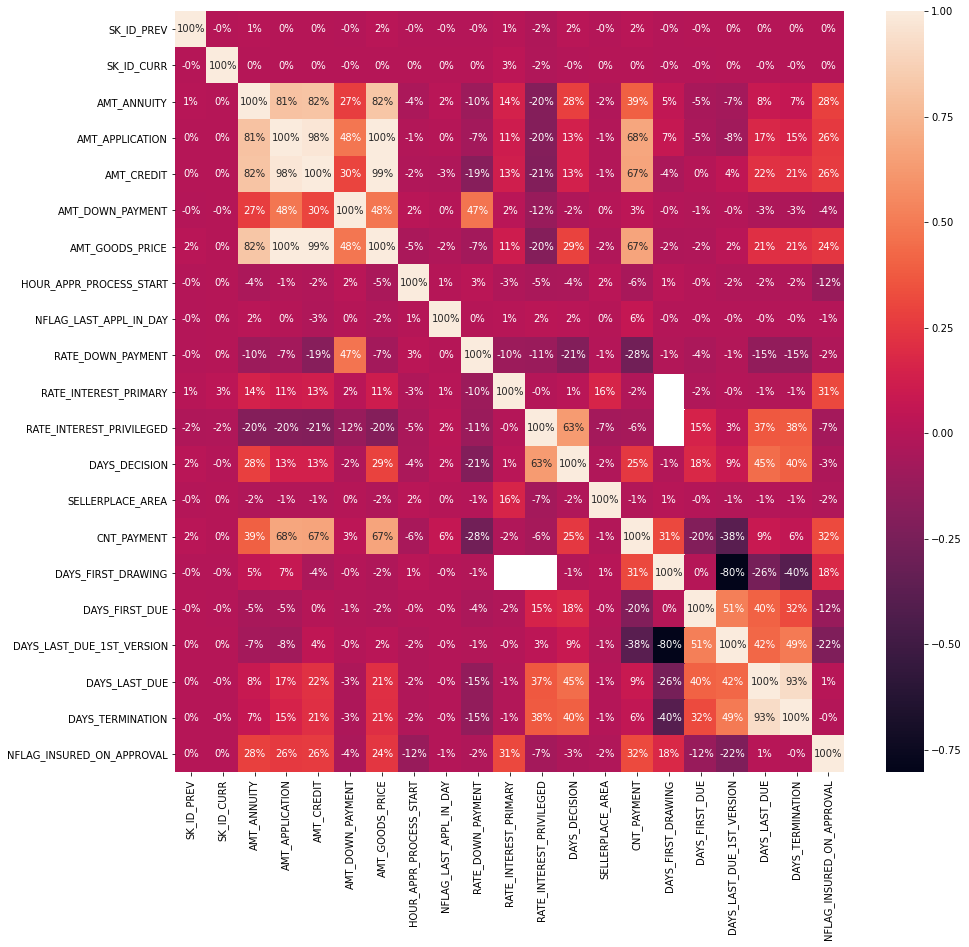

In [101]:
plt.figure(figsize=(15,14))
sb.heatmap(prev_app.corr(),annot=True,fmt='0.0%')

In [369]:
prev_app.drop(['AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE'],axis=1,inplace=True)
# highly correlated with AMT_ANNUITY more than 92%

In [370]:
prev_app.drop(['DAYS_DECISION'],axis=1,inplace=True)
#highly correlated with RATE_INTEREST_PRIVILEGE 63%

In [371]:
prev_app.drop(['DAYS_LAST_DUE_1ST_VERSION'],axis=1,inplace=True)
# correlated with DAYS_FIRST DUE 51%

In [372]:
prev_app.describe(exclude=None)

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_DOWN_PAYMENT,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,7.743700e+05,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,6.697402e+03,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,3.139511e+02,1.605408e+01,342209.855039,13826.269337,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.092150e+04,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.127443e+03,1.456729e+01,88916.115834,72444.869708,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,0.000000e+00,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,1.638000e+03,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,7.740000e+03,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,8.200000e+01,2.400000e+01,365243.000000,-411.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,3.060045e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [376]:
# more than 95% records are missing in these features
prev_app.drop(['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'],axis=1,inplace=True)

In [374]:
prev_app.dropna(subset=['DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL'],axis=0,how='all',inplace=True)

In [377]:
prev_app.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                         4
AMT_DOWN_PAYMENT               348181
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
RATE_DOWN_PAYMENT              348181
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                358801
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                         0
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION                 0
DAYS_FIRST_DRAWING                  0
DAYS_FIRST_D

In [113]:
prev_app.shape

(997149, 30)

In [114]:
prev_app.AMT_DOWN_PAYMENT.value_counts()

0.00         287407
4500.00       19284
9000.00       13337
13500.00       8704
22500.00       7302
              ...  
15295.14          1
68472.00          1
8419.23           1
2918.70           1
287280.00         1
Name: AMT_DOWN_PAYMENT, Length: 27250, dtype: int64

In [115]:
prev_app.AMT_DOWN_PAYMENT.describe()

count    6.489680e+05
mean     6.833368e+03
std      1.884886e+04
min     -9.000000e-01
25%      0.000000e+00
50%      2.253668e+03
75%      8.343000e+03
max      3.060045e+06
Name: AMT_DOWN_PAYMENT, dtype: float64

In [378]:
prev_app['AMT_DOWN_PAYMENT'].fillna(prev_app['AMT_DOWN_PAYMENT'].mean(),inplace=True)

In [379]:
prev_app.RATE_DOWN_PAYMENT.value_counts()

0.000000    287407
0.108909     30136
0.217818      5452
0.326727       946
0.544545       649
             ...  
0.096383         1
0.200868         1
0.101395         1
0.108938         1
0.100060         1
Name: RATE_DOWN_PAYMENT, Length: 191196, dtype: int64

In [380]:
prev_app.RATE_DOWN_PAYMENT.describe()

count    648968.000000
mean          0.085246
std           0.109841
min          -0.000015
25%           0.000000
50%           0.093599
75%           0.108920
max           1.000000
Name: RATE_DOWN_PAYMENT, dtype: float64

In [381]:
prev_app['RATE_DOWN_PAYMENT'].fillna(prev_app['RATE_DOWN_PAYMENT'].mean(),inplace=True)

In [382]:
prev_app.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                         4
AMT_DOWN_PAYMENT                    0
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
RATE_DOWN_PAYMENT                   0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                358801
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                         0
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION                 0
DAYS_FIRST_DRAWING                  0
DAYS_FIRST_D

In [383]:
prev_app.NAME_TYPE_SUITE.value_counts()

Unaccompanied      358444
Family             174038
Spouse, partner     55892
Children            26582
Other_B             14331
Other_A              7394
Group of people      1667
Name: NAME_TYPE_SUITE, dtype: int64

In [384]:
prev_app.NAME_TYPE_SUITE.describe()

count            638348
unique                7
top       Unaccompanied
freq             358444
Name: NAME_TYPE_SUITE, dtype: object

In [385]:
prev_app['NAME_TYPE_SUITE'].fillna(prev_app['NAME_TYPE_SUITE'].mode()[0],inplace=True)

In [386]:
prev_app.dropna(subset=['AMT_ANNUITY'],axis=0,how='any',inplace=True)

In [387]:
prev_app.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_DOWN_PAYMENT               0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
RATE_DOWN_PAYMENT              0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST_DUE                 0
DAYS_LAST_DUE                  0
DAYS_TERMINATION               0
NFLAG_INSURED_ON_APPROVAL      0
dtype: int

In [126]:
prev_app.shape

(997145, 30)

In [388]:
prev_app.drop_duplicates(inplace=True)

In [389]:
prev_app.shape

(997145, 30)

## Random Sampling for Prediction.

In [390]:
prev_app_2=prev_app.sample(frac=0.1, random_state=10)
prev_app_2

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_DOWN_PAYMENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
53542,1181123,432830,Consumer loans,13119.525,7434.000000,FRIDAY,9,Y,1,0.103431,XAP,Approved,Cash through the bank,XAP,Unaccompanied,Repeater,Jewelry,POS,XNA,Country-wide,140,Jewelry,6.0,middle,POS others without interest,365243.0,-69.0,365243.0,365243.0,0.0
373220,1880700,383050,Cash loans,61462.980,6833.368386,SATURDAY,14,Y,1,0.085246,XNA,Approved,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,30.0,middle,Cash X-Sell: middle,365243.0,-725.0,-365.0,-355.0,0.0
120895,2730680,293931,Consumer loans,1909.845,4734.000000,WEDNESDAY,9,Y,1,0.217942,XAP,Approved,Cash through the bank,XAP,Group of people,Repeater,Mobile,POS,XNA,Stone,46,Connectivity,12.0,middle,POS mobile with interest,365243.0,-307.0,-277.0,-275.0,0.0
12567,1151133,342565,Consumer loans,3990.195,3325.500000,WEDNESDAY,16,Y,1,0.108968,XAP,Approved,Cash through the bank,XAP,Family,New,Mobile,POS,XNA,Country-wide,16,Connectivity,10.0,low_normal,POS mobile with interest,365243.0,-2704.0,-2464.0,-2458.0,0.0
1275119,1421652,135496,Consumer loans,5067.540,10440.000000,SATURDAY,14,Y,1,0.274164,XAP,Approved,Cash through the bank,XAP,Family,Repeater,Mobile,POS,XNA,Country-wide,43,Connectivity,8.0,high,POS mobile with interest,365243.0,-1949.0,-1739.0,-1734.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407844,1487101,447823,Consumer loans,6597.315,13500.000000,THURSDAY,12,Y,1,0.233543,XAP,Approved,Cash through the bank,XAP,Unaccompanied,Repeater,Mobile,POS,XNA,Country-wide,32,Connectivity,10.0,low_normal,POS mobile with interest,365243.0,-2853.0,-2583.0,-2580.0,0.0
1198241,2058132,271914,Consumer loans,8224.920,4270.500000,FRIDAY,14,Y,1,0.104262,XAP,Approved,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Country-wide,40,Connectivity,6.0,high,POS mobile with interest,365243.0,-1806.0,-1656.0,-1651.0,0.0
1002534,1305715,370760,Consumer loans,5785.875,0.000000,SATURDAY,13,Y,1,0.000000,XAP,Approved,Cash through the bank,XAP,Unaccompanied,Repeater,Consumer Electronics,POS,XNA,Country-wide,2400,Consumer electronics,4.0,high,POS household with interest,365243.0,-2509.0,-2419.0,-2413.0,1.0
1104533,2403866,192331,Consumer loans,8819.100,14962.500000,SATURDAY,13,Y,1,0.262522,XAP,Approved,Cash through the bank,XAP,"Spouse, partner",Repeater,Audio/Video,POS,XNA,Country-wide,300,Consumer electronics,6.0,middle,POS household with interest,365243.0,-1651.0,-1501.0,-1492.0,0.0


## To_CSV

In [391]:
df=pd.DataFrame(prev_app_2)
df.to_csv('prev_app_2_new.csv')

# 3.BUREAU

In [392]:
bureau=pd.read_csv('bureau.csv')
bureau

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,NaN,0.0,0,11250.00,11250.0,0.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,-2493.0,5476.5,0,38130.84,0.0,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,currency 1,-1809,0,-1628.0,-970.0,NaN,0,15570.00,NaN,NaN,0.0,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,-1513.0,NaN,0,36000.00,0.0,0.0,0.0,Consumer credit,-1508,NaN


In [393]:
bureau.shape

(1716428, 17)

In [394]:
bureau.describe()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
count,1.716428e+06,1.716428e+06,1.716428e+06,1.716428e+06,1.610875e+06,1.082775e+06,5.919400e+05,1.716428e+06,1.716415e+06,1.458759e+06,1.124648e+06,1.716428e+06,1.716428e+06,4.896370e+05
mean,2.782149e+05,5.924434e+06,-1.142108e+03,8.181666e-01,5.105174e+02,-1.017437e+03,3.825418e+03,6.410406e-03,3.549946e+05,1.370851e+05,6.229515e+03,3.791276e+01,-5.937483e+02,1.571276e+04
std,1.029386e+05,5.322657e+05,7.951649e+02,3.654443e+01,4.994220e+03,7.140106e+02,2.060316e+05,9.622391e-02,1.149811e+06,6.774011e+05,4.503203e+04,5.937650e+03,7.207473e+02,3.258269e+05
min,1.000010e+05,5.000000e+06,-2.922000e+03,0.000000e+00,-4.206000e+04,-4.202300e+04,0.000000e+00,0.000000e+00,0.000000e+00,-4.705600e+06,-5.864061e+05,0.000000e+00,-4.194700e+04,0.000000e+00
25%,1.888668e+05,5.463954e+06,-1.666000e+03,0.000000e+00,-1.138000e+03,-1.489000e+03,0.000000e+00,0.000000e+00,5.130000e+04,0.000000e+00,0.000000e+00,0.000000e+00,-9.080000e+02,0.000000e+00
50%,2.780550e+05,5.926304e+06,-9.870000e+02,0.000000e+00,-3.300000e+02,-8.970000e+02,0.000000e+00,0.000000e+00,1.255185e+05,0.000000e+00,0.000000e+00,0.000000e+00,-3.950000e+02,0.000000e+00
75%,3.674260e+05,6.385681e+06,-4.740000e+02,0.000000e+00,4.740000e+02,-4.250000e+02,0.000000e+00,0.000000e+00,3.150000e+05,4.015350e+04,0.000000e+00,0.000000e+00,-3.300000e+01,1.350000e+04
max,4.562550e+05,6.843457e+06,0.000000e+00,2.792000e+03,3.119900e+04,0.000000e+00,1.159872e+08,9.000000e+00,5.850000e+08,1.701000e+08,4.705600e+06,3.756681e+06,3.720000e+02,1.184534e+08


In [395]:
bureau.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

<AxesSubplot:>

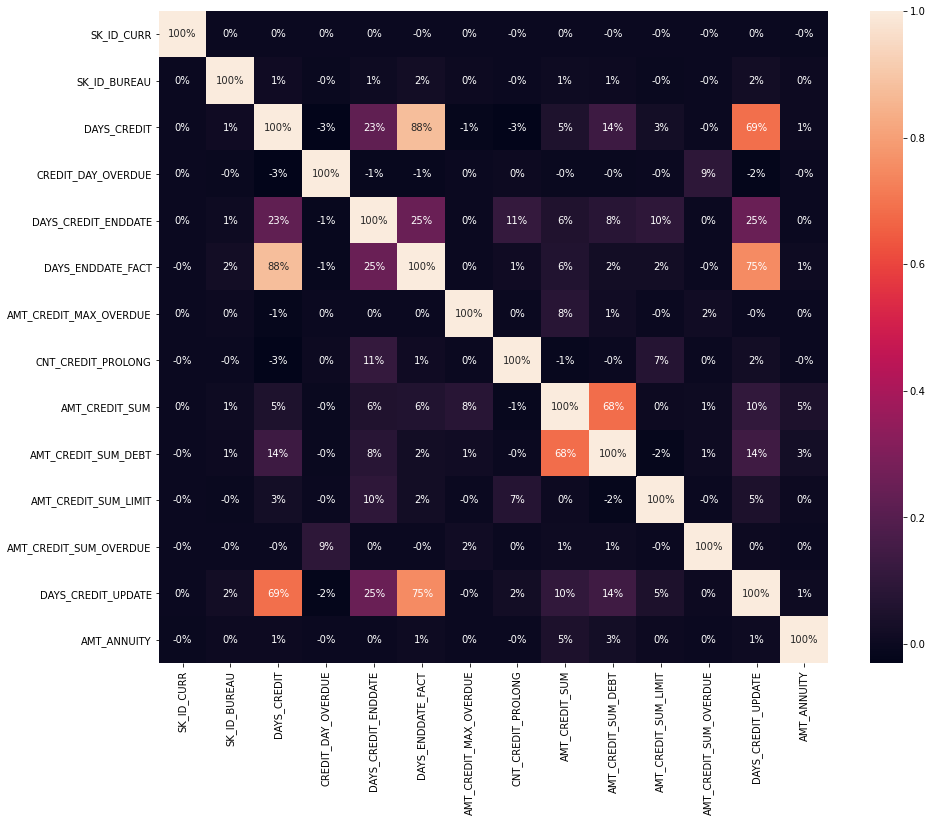

In [135]:
plt.figure(figsize=(15,12))
sb.heatmap(bureau.corr(),annot=True,fmt='0.0%')

## EDA

In [396]:
# correlated with DAYS_CREDIT
bureau.drop(['DAYS_CREDIT_UPDATE','DAYS_ENDDATE_FACT'],axis=1,inplace=True)

In [397]:
#correlated with AMT_CREDIT_SUM
bureau.drop(['AMT_CREDIT_SUM_DEBT'],axis=1,inplace=True)

In [400]:
bureau.dropna(subset=['AMT_ANNUITY','AMT_CREDIT_MAX_OVERDUE',],axis=0,how='any',inplace=True)

In [401]:
bureau.isnull().sum()

SK_ID_CURR                    0
SK_ID_BUREAU                  0
CREDIT_ACTIVE                 0
CREDIT_CURRENCY               0
DAYS_CREDIT                   0
CREDIT_DAY_OVERDUE            0
DAYS_CREDIT_ENDDATE       17792
AMT_CREDIT_MAX_OVERDUE        0
CNT_CREDIT_PROLONG            0
AMT_CREDIT_SUM                0
AMT_CREDIT_SUM_LIMIT      20300
AMT_CREDIT_SUM_OVERDUE        0
CREDIT_TYPE                   0
AMT_ANNUITY                   0
dtype: int64

In [140]:
bureau.AMT_ANNUITY.describe()

count    4.896370e+05
mean     1.571276e+04
std      3.258269e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.350000e+04
max      1.184534e+08
Name: AMT_ANNUITY, dtype: float64

In [142]:
bureau.AMT_CREDIT_SUM_LIMIT.describe()

count    7.093660e+05
mean     9.111802e+03
std      5.398707e+04
min     -5.864061e+05
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.705600e+06
Name: AMT_CREDIT_SUM_LIMIT, dtype: float64

In [402]:
bureau['AMT_CREDIT_SUM_LIMIT'].fillna(bureau['AMT_CREDIT_SUM_LIMIT'].mean(),inplace=True)

In [144]:
bureau.AMT_CREDIT_MAX_OVERDUE .describe()

count    5.919400e+05
mean     3.825418e+03
std      2.060316e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.159872e+08
Name: AMT_CREDIT_MAX_OVERDUE, dtype: float64

In [145]:
bureau.AMT_CREDIT_MAX_OVERDUE.nunique()

68251

In [146]:
bureau.AMT_CREDIT_MAX_OVERDUE.value_counts()

0.000        470650
1440.000        688
225.000         405
45.000          377
4.500           315
              ...  
19228.995         1
9817.605          1
8918.100          1
16203.240         1
20907.855         1
Name: AMT_CREDIT_MAX_OVERDUE, Length: 68251, dtype: int64

In [148]:
bureau.isnull().sum()

SK_ID_CURR                    0
SK_ID_BUREAU                  0
CREDIT_ACTIVE                 0
CREDIT_CURRENCY               0
DAYS_CREDIT                   0
CREDIT_DAY_OVERDUE            0
DAYS_CREDIT_ENDDATE       75330
AMT_CREDIT_MAX_OVERDUE        0
CNT_CREDIT_PROLONG            0
AMT_CREDIT_SUM                3
AMT_CREDIT_SUM_LIMIT          0
AMT_CREDIT_SUM_OVERDUE        0
CREDIT_TYPE                   0
AMT_ANNUITY                   0
dtype: int64

In [403]:
bureau.dropna(subset=['AMT_CREDIT_SUM'],axis=0,how='any',inplace=True)

In [150]:
bureau.DAYS_CREDIT_ENDDATE.describe()

count    888688.000000
mean        416.568974
std        4679.627805
min      -42060.000000
25%       -1159.000000
50%        -338.000000
75%         380.000000
max       31197.000000
Name: DAYS_CREDIT_ENDDATE, dtype: float64

In [404]:
bureau['DAYS_CREDIT_ENDDATE'].fillna(bureau['DAYS_CREDIT_ENDDATE'].mean(),inplace=True)

In [405]:
bureau.DAYS_CREDIT_ENDDATE.value_counts()

1020.486608     17792
133.000000         92
6.000000           79
70.000000          78
97.000000          78
                ...  
12631.000000        1
6479.000000         1
2385.000000         1
2046.000000         1
7182.000000         1
Name: DAYS_CREDIT_ENDDATE, Length: 8225, dtype: int64

In [406]:
bureau.DAYS_CREDIT_ENDDATE.nunique()

8225

In [407]:
bureau.shape

(117556, 14)

## Randomly Selecting Data for prediction

In [408]:
bureau_2=bureau.sample(frac=0.1, random_state=10)
bureau_2

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,AMT_ANNUITY
1252156,386450,6618299,Closed,currency 1,-684,0,-158.000000,0.00,0,2025000.00,0.000000,0.0,Consumer credit,2250.000
442272,274085,6525246,Closed,currency 1,-2770,0,-2678.000000,0.00,0,71367.21,17246.631427,0.0,Consumer credit,0.000
555192,325801,6395369,Active,currency 1,-1848,0,1020.486608,0.00,0,297000.00,297000.000000,0.0,Credit card,29700.000
916315,330814,5066694,Closed,currency 1,-721,0,-659.000000,0.00,0,120964.50,0.000000,0.0,Consumer credit,0.000
1278608,442765,6163288,Active,currency 1,-61,0,1020.486608,0.00,0,64371.42,4521.510000,0.0,Credit card,6437.160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846682,318323,6277102,Active,currency 1,-434,0,1020.486608,0.00,0,679500.00,41168.340000,0.0,Credit card,67950.000
939798,292950,6290308,Closed,currency 1,-318,0,-134.000000,0.00,0,33298.11,0.000000,0.0,Consumer credit,3704.985
1355872,374668,6728100,Closed,currency 1,-1338,0,-299.000000,8403.66,0,675000.00,0.000000,0.0,Consumer credit,0.000
149614,181693,6549565,Active,currency 1,-22,0,344.000000,0.00,0,63000.00,0.000000,0.0,Consumer credit,6574.500


In [409]:
bureau_2.drop_duplicates(inplace=True)

In [410]:
bureau_2.shape

(11756, 14)

## To_CSV

In [411]:
df=pd.DataFrame(bureau_2)
df.to_csv('bureau_2_new.csv')

# POS_CASH_BALANCE

In [412]:
pos_cash_balance=pd.read_csv('POS_CASH_BALANCE.csv')
pos_cash_balance

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


In [413]:
pos_cash_balance.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

## EDA

<AxesSubplot:>

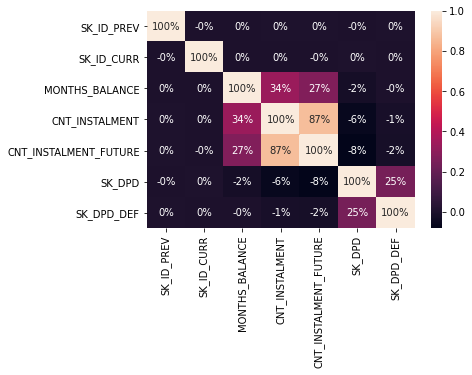

In [414]:
sb.heatmap(pos_cash_balance.corr(),annot=True,fmt='0.0%')

In [415]:
pos_cash_balance.drop(['CNT_INSTALMENT_FUTURE'],axis=1,inplace=True)
# highly corelated with CNT_INSTALMENT (87%)

In [416]:
pos_cash_balance

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,Active,0,0
1,1715348,367990,-33,36.0,Active,0,0
2,1784872,397406,-32,12.0,Active,0,0
3,1903291,269225,-35,48.0,Active,0,0
4,2341044,334279,-35,36.0,Active,0,0
...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,Active,843,0
10001354,1717234,141565,-19,12.0,Active,602,0
10001355,1283126,315695,-21,10.0,Active,609,0
10001356,1082516,450255,-22,12.0,Active,614,0


In [417]:
pos_cash_balance.drop_duplicates(inplace=True)

In [165]:
pos_cash_balance.shape

(10001358, 7)

## Random Sampling for Prediction.

In [418]:
pos_cash_bal_2=pos_cash_balance.sample(frac=0.1, random_state=10)
pos_cash_bal_2

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
4735885,1334699,124938,-8,31.0,Active,0,0
8937809,1618252,226293,-48,10.0,Active,0,0
5772785,2347326,356152,-51,6.0,Active,0,0
7718783,2123232,188508,-45,12.0,Active,11,11
4545794,2448161,345330,-16,36.0,Active,0,0
...,...,...,...,...,...,...,...
3696206,1947447,140721,-11,30.0,Active,0,0
5197486,1548618,222918,-26,24.0,Active,0,0
1538552,1469711,288063,-32,6.0,Active,0,0
7094413,2653656,388299,-63,36.0,Active,0,0


## To_CSV

In [419]:
df=pd.DataFrame(pos_cash_bal_2)
df.to_csv('pos_cash_bal_2_new.csv')

# CREDIT_CARD_BALANCE

In [420]:
cred_card_bal=pd.read_csv('credit_card_balance.csv')
cred_card_bal

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.00,1800.000,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.00,2250.000,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.00,2250.000,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.00,11925.000,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.00,27000.000,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840307,1036507,328243,-9,0.000,45000,NaN,0.0,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3840308,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,1879.11,0.000,0.000,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3840309,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,375750.00,356994.675,269356.140,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0
3840310,1624872,430337,-10,0.000,450000,NaN,0.0,NaN,NaN,0.000,NaN,0.000,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0


In [421]:
cred_card_bal.shape

(3840312, 23)

In [422]:
cred_card_bal.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

In [173]:
cred_card_bal.shape

(3840312, 23)

## EDA

In [423]:
cred_card_bal.dropna(subset=['AMT_DRAWINGS_ATM_CURRENT','AMT_DRAWINGS_OTHER_CURRENT','AMT_DRAWINGS_POS_CURRENT','AMT_PAYMENT_CURRENT','CNT_DRAWINGS_ATM_CURRENT','CNT_DRAWINGS_OTHER_CURRENT','CNT_DRAWINGS_POS_CURRENT'],axis=0,how='all',inplace=True)

In [424]:
cred_card_bal.dropna(subset=['AMT_DRAWINGS_ATM_CURRENT','AMT_DRAWINGS_OTHER_CURRENT','AMT_DRAWINGS_POS_CURRENT','AMT_PAYMENT_CURRENT','CNT_DRAWINGS_ATM_CURRENT','CNT_DRAWINGS_OTHER_CURRENT','CNT_DRAWINGS_POS_CURRENT'],axis=0,how='any',inplace=True)

In [425]:
cred_card_bal.dropna(subset=['CNT_INSTALMENT_MATURE_CUM','AMT_INST_MIN_REGULARITY'],axis=0,how='all',inplace=True)

In [426]:
print(cred_card_bal.isnull().sum())
print(cred_card_bal.shape)

SK_ID_PREV                    0
SK_ID_CURR                    0
MONTHS_BALANCE                0
AMT_BALANCE                   0
AMT_CREDIT_LIMIT_ACTUAL       0
AMT_DRAWINGS_ATM_CURRENT      0
AMT_DRAWINGS_CURRENT          0
AMT_DRAWINGS_OTHER_CURRENT    0
AMT_DRAWINGS_POS_CURRENT      0
AMT_INST_MIN_REGULARITY       0
AMT_PAYMENT_CURRENT           0
AMT_PAYMENT_TOTAL_CURRENT     0
AMT_RECEIVABLE_PRINCIPAL      0
AMT_RECIVABLE                 0
AMT_TOTAL_RECEIVABLE          0
CNT_DRAWINGS_ATM_CURRENT      0
CNT_DRAWINGS_CURRENT          0
CNT_DRAWINGS_OTHER_CURRENT    0
CNT_DRAWINGS_POS_CURRENT      0
CNT_INSTALMENT_MATURE_CUM     0
NAME_CONTRACT_STATUS          0
SK_DPD                        0
SK_DPD_DEF                    0
dtype: int64
(3014276, 23)


<AxesSubplot:>

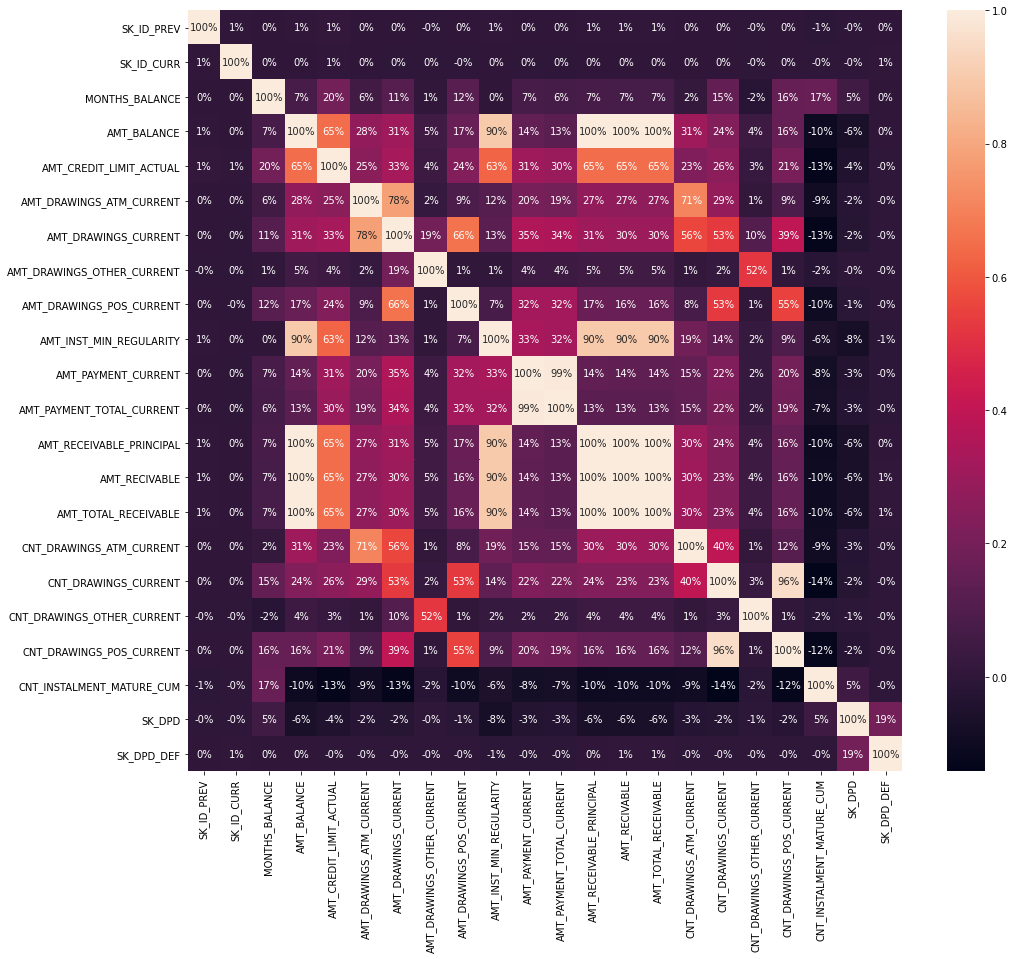

In [427]:
plt.figure(figsize=(16,14))
sb.heatmap(cred_card_bal.corr(),annot=True,fmt='0.0%')

## Dropping Features Based on Correlation

In [428]:
cred_card_bal.drop(['AMT_CREDIT_LIMIT_ACTUAL'],axis=1,inplace=True)
# correlated with AMT_BALANCE(65%)

In [429]:
cred_card_bal.drop(['AMT_INST_MIN_REGULARITY'],axis=1,inplace=True)
# correlated with AMT_BALANCE(90%)

In [430]:
cred_card_bal.drop(['AMT_RECEIVABLE_PRINCIPAL','AMT_RECIVABLE','AMT_TOTAL_RECEIVABLE'],axis=1,inplace=True)
# correlated with AMT_BALANCE(100%)

In [431]:
cred_card_bal.drop(['AMT_DRAWINGS_CURRENT','CNT_DRAWINGS_ATM_CURRENT'],axis=1,inplace=True)
# correlated with 'AMT_DRAWINGS_ATM_CURRENT' (78% , 71%)

In [432]:
cred_card_bal.shape

(3014276, 16)

In [433]:
cred_card_bal.isnull().sum()

SK_ID_PREV                    0
SK_ID_CURR                    0
MONTHS_BALANCE                0
AMT_BALANCE                   0
AMT_DRAWINGS_ATM_CURRENT      0
AMT_DRAWINGS_OTHER_CURRENT    0
AMT_DRAWINGS_POS_CURRENT      0
AMT_PAYMENT_CURRENT           0
AMT_PAYMENT_TOTAL_CURRENT     0
CNT_DRAWINGS_CURRENT          0
CNT_DRAWINGS_OTHER_CURRENT    0
CNT_DRAWINGS_POS_CURRENT      0
CNT_INSTALMENT_MATURE_CUM     0
NAME_CONTRACT_STATUS          0
SK_DPD                        0
SK_DPD_DEF                    0
dtype: int64

In [185]:
cred_card_bal.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_PAYMENT_CURRENT',
       'AMT_PAYMENT_TOTAL_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

<AxesSubplot:>

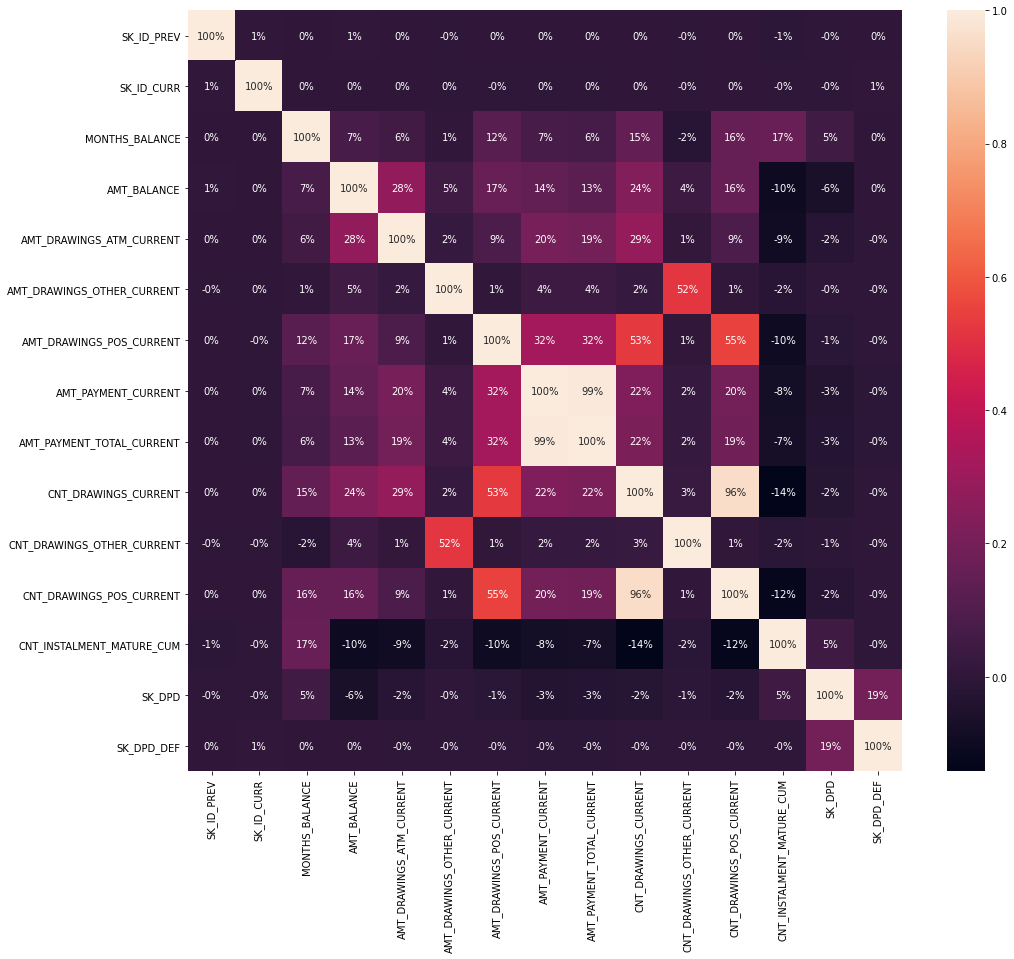

In [186]:
plt.figure(figsize=(16,14))
sb.heatmap(cred_card_bal.corr(),annot=True,fmt='0.0%')

In [187]:
cred_card_bal.drop_duplicates(inplace=True)

In [188]:
cred_card_bal.shape

(3014276, 16)

## Random Sampling for Prediction.

In [434]:
cred_card_bal_2=cred_card_bal.sample(frac=0.1,random_state=10)
cred_card_bal_2

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
582780,1897438,247292,-39,0.000,0.0,0.0,0.00,9162.360,0.000,0,0.0,0.0,28.0,Active,0,0
3049295,1499669,215811,-22,89203.275,0.0,0.0,0.00,6750.000,6750.000,0,0.0,0.0,54.0,Active,0,0
2500046,1782145,373549,-67,109390.950,0.0,0.0,0.00,9000.000,9000.000,0,0.0,0.0,8.0,Active,0,0
726689,2088536,386332,-33,0.000,0.0,0.0,0.00,94.590,0.000,0,0.0,0.0,63.0,Active,0,0
1655708,2186849,338905,-37,72553.230,67500.0,0.0,0.00,0.000,0.000,2,0.0,0.0,1.0,Active,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591321,2173301,440093,-5,123551.550,0.0,0.0,0.00,6750.000,6750.000,0,0.0,0.0,11.0,Active,0,0
1363582,1586050,273807,-3,20.700,2250.0,0.0,167.85,22522.500,20272.500,3,0.0,1.0,1.0,Active,0,0
2049252,2475911,307250,-35,0.000,0.0,0.0,0.00,324.810,0.000,0,0.0,0.0,44.0,Active,0,0
1780420,1619123,437791,-4,0.000,0.0,0.0,0.00,17.145,17.145,0,0.0,0.0,3.0,Active,0,0


## TO_CSV

In [435]:
df=pd.DataFrame(cred_card_bal_2)
df.to_csv('cred_card_bal_2_new.csv')

# INSTALLMENT PAYMENTS

In [436]:
install_pay=pd.read_csv('installments_payments.csv')
install_pay

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [437]:
install_pay.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

In [193]:
install_pay.shape

(13605401, 8)

## EDA

In [194]:
install_pay.SK_ID_PREV.nunique()

997752

In [195]:
install_pay.SK_ID_PREV.describe(exclude=None)

count    1.360540e+07
mean     1.903365e+06
std      5.362029e+05
min      1.000001e+06
25%      1.434191e+06
50%      1.896520e+06
75%      2.369094e+06
max      2.843499e+06
Name: SK_ID_PREV, dtype: float64

In [196]:
install_pay.SK_ID_CURR.nunique()

339587

In [197]:
install_pay.SK_ID_CURR.describe(exclude=None)

count    1.360540e+07
mean     2.784449e+05
std      1.027183e+05
min      1.000010e+05
25%      1.896390e+05
50%      2.786850e+05
75%      3.675300e+05
max      4.562550e+05
Name: SK_ID_CURR, dtype: float64

In [198]:
install_pay.NUM_INSTALMENT_VERSION.nunique()

65

In [199]:
install_pay.NUM_INSTALMENT_VERSION.describe()

count    1.360540e+07
mean     8.566373e-01
std      1.035216e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.780000e+02
Name: NUM_INSTALMENT_VERSION, dtype: float64

In [200]:
install_pay.NUM_INSTALMENT_NUMBER.nunique()

277

In [201]:
install_pay.NUM_INSTALMENT_NUMBER.describe()

count    1.360540e+07
mean     1.887090e+01
std      2.666407e+01
min      1.000000e+00
25%      4.000000e+00
50%      8.000000e+00
75%      1.900000e+01
max      2.770000e+02
Name: NUM_INSTALMENT_NUMBER, dtype: float64

In [438]:
install_pay.dropna(subset=['AMT_PAYMENT','DAYS_ENTRY_PAYMENT'],axis=0,inplace=True,how='any')

In [203]:
install_pay.isnull().sum()

SK_ID_PREV                0
SK_ID_CURR                0
NUM_INSTALMENT_VERSION    0
NUM_INSTALMENT_NUMBER     0
DAYS_INSTALMENT           0
DAYS_ENTRY_PAYMENT        0
AMT_INSTALMENT            0
AMT_PAYMENT               0
dtype: int64

In [204]:
install_pay.corr()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
SK_ID_PREV,1.000000,0.002131,0.000649,-0.002096,0.003749,0.003734,0.002049,0.001887
SK_ID_CURR,0.002131,1.000000,0.000399,-0.000549,0.001189,0.001215,-0.000226,-0.000124
NUM_INSTALMENT_VERSION,0.000649,0.000399,1.000000,-0.324525,0.130460,0.128124,0.168426,0.177176
NUM_INSTALMENT_NUMBER,-0.002096,-0.000549,-0.324525,1.000000,0.090315,0.094305,-0.089602,-0.087664
DAYS_INSTALMENT,0.003749,0.001189,0.130460,0.090315,1.000000,0.999491,0.125965,0.127018
DAYS_ENTRY_PAYMENT,0.003734,0.001215,0.128124,0.094305,0.999491,1.000000,0.125555,0.126602
AMT_INSTALMENT,0.002049,-0.000226,0.168426,-0.089602,0.125965,0.125555,1.000000,0.937191
AMT_PAYMENT,0.001887,-0.000124,0.177176,-0.087664,0.127018,0.126602,0.937191,1.000000


<AxesSubplot:>

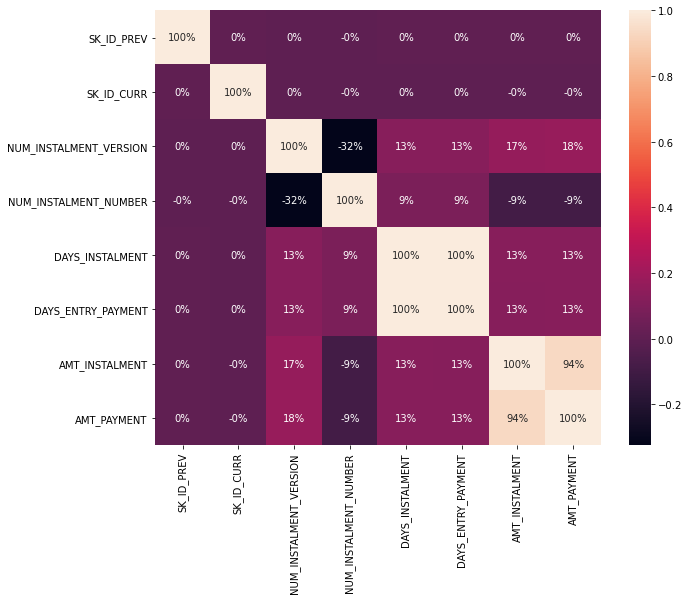

In [205]:
plt.figure(figsize=(10,8))
sb.heatmap(install_pay.corr(),annot=True,fmt='0.0%')

## Dropping Features Based on Correlation.

In [439]:
install_pay.drop(['DAYS_ENTRY_PAYMENT'],axis=1,inplace=True)
# correlated with DAYS_INSTALLMENT(100%)

In [440]:
install_pay.drop(['AMT_PAYMENT'],axis=1,inplace=True)
# Correlated with AMT_INSTALMENT(94%)

In [441]:
install_pay.shape

(13602496, 6)

In [442]:
install_pay.isnull().sum()

SK_ID_PREV                0
SK_ID_CURR                0
NUM_INSTALMENT_VERSION    0
NUM_INSTALMENT_NUMBER     0
DAYS_INSTALMENT           0
AMT_INSTALMENT            0
dtype: int64

In [210]:
install_pay.drop_duplicates(inplace=True)

In [211]:
install_pay.shape

(12949013, 6)

## Random Sampling for Prediction.

In [443]:
install_pay_2=install_pay.sample(frac=0.1, random_state=10)
install_pay_2

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,AMT_INSTALMENT
1061,2128474,181432,1.0,11,-2409.0,3809.430
7123746,2447928,291560,1.0,8,-2065.0,14035.995
8354571,2751842,356135,0.0,29,-1711.0,9000.000
9993076,1765244,342094,2.0,6,-737.0,54539.100
5522573,1945874,240666,0.0,96,-204.0,206.325
...,...,...,...,...,...,...
4543870,1767869,271736,1.0,7,-1334.0,35618.445
6172592,1398143,264433,1.0,2,-2867.0,9730.575
11296664,2102495,377439,1.0,4,-998.0,6048.270
8621962,1826878,317163,1.0,6,-1479.0,9079.110


## To_CSV

In [444]:
df=pd.DataFrame(install_pay_2)
df.to_csv('install_pay_2_new.csv')

# BUREAU BALANCE

In [445]:
b_b=pd.read_csv('bureau_balance.csv')
b_b

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
...,...,...,...
27299920,5041336,-47,X
27299921,5041336,-48,X
27299922,5041336,-49,X
27299923,5041336,-50,X


In [215]:
b_b.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [446]:
b_b.drop_duplicates(inplace=True)

In [447]:
b_b.shape

(27299925, 3)

##  Random Sampling for Prediction.

In [448]:
bur_bal_2 = b_b.sample(frac=0.1, random_state=10)
bur_bal_2

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
26911196,6687938,-3,C
15238007,6208483,-10,C
14738340,6387756,-1,C
9468400,5742699,-14,0
5072161,6583475,-22,0
...,...,...,...
6025246,6579704,-36,0
23972,5229282,-4,C
10898065,6535628,-45,C
2963867,6560636,-38,X


## To_CSV

In [449]:
df=pd.DataFrame(bur_bal_2)
df.to_csv('bu_bal_2_new.csv')